<a href="https://colab.research.google.com/github/muscak/Master-Machine-Learning-Algorithms/blob/master/Nonlinear-Algorithms/Gaussian-Naive-Bayes/Gaussian_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Naive Bayes

Naive Bayes is a classification algorithm suitable for binary and multiclass classification. This is the extention of Naive Bayes which allows us working with real-valued attributes by assuming them in Gaussian (Normal) distribution which is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data [1].

In Naive Bayes, the probabilities for input values for each class are calculated using frequencies. With real-valued inputs, we can calculate the mean and standard deviation of input values ($x$) for each class to summarize the distribution.

There are 2 steps to apply Gaussian Naive Bayes as regular Naive Bayes. Those are:
1. Calculating the probabilities for each class
2. Calculating the conditional probabilities but this time using the Gaussian Probability Density Function (PDF).


## Table of Contents
1. [Introduction](#introduction)
2. [Import Libraries](#libraries)
3. [Gaussian Probability Density Function](#pdf)
4. [Load Sample Data](#sampledata)
5. [Using Sklearn Library](#sklearn)
6. [Real Data](#realdata)

## Introduction<a id='introduction'></a>

## Import Libraries<a id='libraries'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math as m
sb.set_style('whitegrid')
sb.despine(offset=10, trim=True);

<Figure size 640x480 with 0 Axes>

## Gaussian Probability Density Function (PDF)<a id='pdf'></a>

In statistics, a normal distribution or Gaussian distribution is a type of continuous probability distribution for a real-valued random variable [2]. The general form of its probability density function is

$$pdf(x, \mu, \sigma) = \frac{1}{\sigma \times \sqrt{2 \times \pi}} \times e^{-(\frac{(x-\mu)^2}{2 \times \sigma^2})}$$

Where $pdf(x)$ is the Gaussian PDF, $\mu$ and $\sigma$ are the mean and standard deviation calculated, $\pi$ is the numerical constant PI, $e$ is the numerical constant Euler’s number raised to power and $x$ is the input value for the input variable. $\mu$ and $\sigma$ can be calculated as follow:

$$\mu = \frac{1}{n} \times \sum_{i=1}^nx_i$$

$$\sigma = \sqrt{\frac{1}{n} \times \sum_{i=1}^n(x_i - μ)^2}$$

In [2]:
# Creating a sample array
x = np.arange(-5, 6, 1)

# Setting the mean and standard deviation
mean = 0
std = 1

# Manually calculating PDF
pdf_x = []

for i in x:
  a = (1 / (np.sqrt(2*m.pi)*std)) * np.exp(-1 * (np.square(i-mean) / (2*np.square(std))))
  pdf_x.append(a)

pdf_x

[1.4867195147342977e-06,
 0.00013383022576488537,
 0.0044318484119380075,
 0.05399096651318806,
 0.24197072451914337,
 0.3989422804014327,
 0.24197072451914337,
 0.05399096651318806,
 0.0044318484119380075,
 0.00013383022576488537,
 1.4867195147342977e-06]

<AxesSubplot: ylabel='Density'>

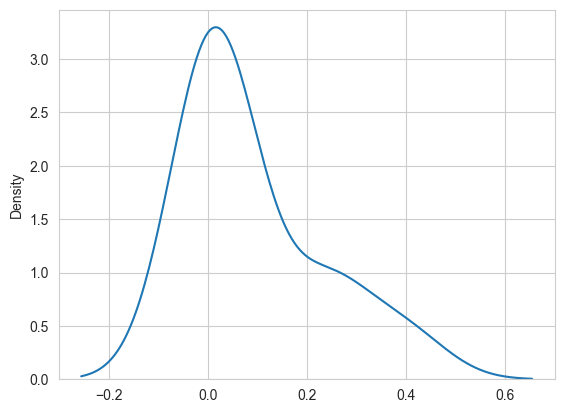

In [3]:
# Displaying the PDF graph for the sample array
sb.kdeplot(pdf_x)

<AxesSubplot: ylabel='Density'>

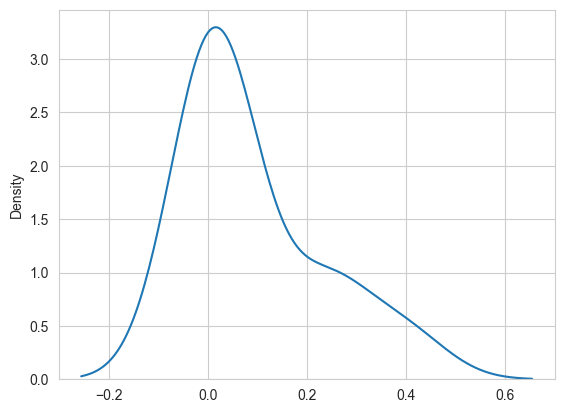

In [4]:
# Calculating PDF using Scipystats library
from scipy.stats import norm
sb.kdeplot(norm.pdf(x, mean, std))

## Load Sample Data <a id='sampledata'></a>

The data has 2 real-valued attributes (numeric features) and 1 categorical label. Gaussian Naive Bayes can handle numeric features unlike the Naive Bayes.

In [5]:
# Creating inputs
x1 = [3.393533211, 3.110073483, 1.343808831, 3.582294042, 2.280362439, 
      7.423436942, 5.745051997, 9.172168622, 7.792783481, 7.939820817]
x2 = [2.331273381, 1.781539638, 3.368360954, 4.67917911, 2.866990263, 
      4.696522875, 3.533989803, 2.511101045, 3.424088941, 0.791637231]

# Creating label
y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# Converting them into dataframe
df = pd.DataFrame(zip(x1, x2, y), columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


<AxesSubplot: xlabel='x1', ylabel='x2'>

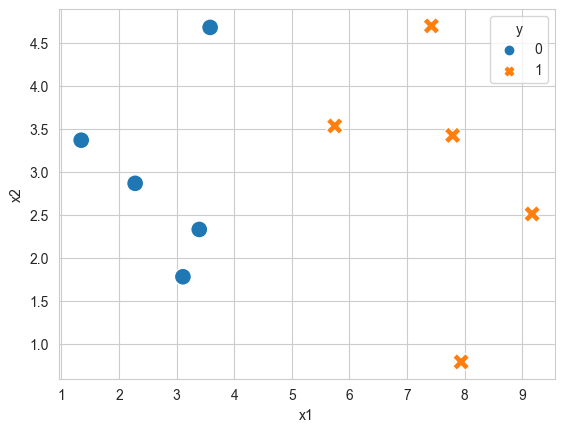

In [6]:
# Displaying scatterplot of the data
sb.scatterplot(data=df, x='x1', y='x2', hue='y', style='y', s=150)

## Make Predictions with Gaussian Naive Bayes Model <a id='prediction'></a>

First, the PDF of each input for each label are calcualted separately. PDF is calculated as described in the [above](#pdf) section. Then the conditional probability is calculated as shown below.

$$y_i = P(pdf(x_1) | y = i)... \times ...P(pdf(x_p) | y = i) \times P(y = i)$$


In [7]:
# Calculate Class Probabilities
y_0 = len(df[df['y'] == 0]) / len(df['y'])
y_1 = len(df[df['y'] == 1]) / len(df['y'])

In [8]:
# Calculate mean of each feature for each label
x1_y0_mean = df['x1'][df['y'] == 0].mean()
x1_y1_mean = df['x1'][df['y'] == 1].mean()
x2_y0_mean = df['x2'][df['y'] == 0].mean()
x2_y1_mean = df['x2'][df['y'] == 1].mean()

# Calculate standard deviation of each feature for each label
x1_y0_std = df['x1'][df['y'] == 0].std()
x1_y1_std = df['x1'][df['y'] == 1].std()
x2_y0_std = df['x2'][df['y'] == 0].std()
x2_y1_std = df['x2'][df['y'] == 1].std()

In [9]:
# Creata copy of the dataframe
df_pred = df.copy()

# Calculate PDF of each feature for each label
df_pred['pdf_x1_y0'] = norm.pdf(df_pred['x1'], x1_y0_mean, x1_y0_std)
df_pred['pdf_x2_y0'] = norm.pdf(df_pred['x2'], x2_y0_mean, x2_y0_std)
df_pred['pdf_x1_y1'] = norm.pdf(df_pred['x1'], x1_y1_mean, x1_y1_std)
df_pred['pdf_x2_y1'] = norm.pdf(df_pred['x2'], x2_y1_mean, x2_y1_std)

# Calculate conditional probability of each label
df_pred['out_y0'] = df_pred['pdf_x1_y0'] * df_pred['pdf_x2_y0'] * y_0
df_pred['out_y1'] = df_pred['pdf_x1_y1'] * df_pred['pdf_x2_y1'] * y_1
df_pred

,x1,x2,y,pdf_x1_y0,pdf_x2_y0,pdf_x1_y1,pdf_x2_y1,out_y0,out_y1
0,3.393533,2.331273,0,3.362559e-01,0.299321,9.340506e-04,0.247475,5.032428e-02,1.155772e-04
1,3.110073,1.781540,0,3.978954e-01,0.195591,4.148672e-04,0.194072,3.891230e-02,4.025712e-05
2,1.343809,3.368361,0,1.378989e-01,0.341438,8.049754e-07,0.265278,2.354196e-02,1.067712e-07
3,3.582294,4.679179,0,2.853953e-01,0.114959,1.557322e-03,0.139895,1.640435e-02,1.089305e-04
4,2.280362,2.866990,0,3.803012e-01,0.357468,2.848450e-05,0.273336,6.797275e-02,3.892921e-06
5,7.423437,4.696523,1,1.232827e-06,0.112256,3.193247e-01,0.137962,6.919582e-08,2.202730e-02
6,5.745052,3.533990,1,2.254527e-03,0.321488,1.026459e-01,0.255897,3.624019e-04,1.313337e-02
7,9.172169,2.511101,1,1.500334e-11,0.326101,1.457989e-01,0.259772,2.446300e-12,1.893726e-02
8,7.792783,3.424089,1,1.519618e-07,0.335428,3.198314e-01,0.262464,2.548609e-08,4.197207e-02
9,7.939821,0.791637,1,6.318137e-08,0.048831,3.121587e-01,0.087371,1.542597e-09,1.363675e-02


In [10]:
df_pred['Prediction'] = ''
df_pred.loc[df_pred['out_y0'] > df_pred['out_y1'], 'Prediction'] = 0
df_pred.loc[df_pred['out_y0'] <= df_pred['out_y1'], 'Prediction'] = 1
df_pred

,x1,x2,y,pdf_x1_y0,pdf_x2_y0,pdf_x1_y1,pdf_x2_y1,out_y0,out_y1,Prediction
0,3.393533,2.331273,0,3.362559e-01,0.299321,9.340506e-04,0.247475,5.032428e-02,1.155772e-04,0
1,3.110073,1.781540,0,3.978954e-01,0.195591,4.148672e-04,0.194072,3.891230e-02,4.025712e-05,0
2,1.343809,3.368361,0,1.378989e-01,0.341438,8.049754e-07,0.265278,2.354196e-02,1.067712e-07,0
3,3.582294,4.679179,0,2.853953e-01,0.114959,1.557322e-03,0.139895,1.640435e-02,1.089305e-04,0
4,2.280362,2.866990,0,3.803012e-01,0.357468,2.848450e-05,0.273336,6.797275e-02,3.892921e-06,0
5,7.423437,4.696523,1,1.232827e-06,0.112256,3.193247e-01,0.137962,6.919582e-08,2.202730e-02,1
6,5.745052,3.533990,1,2.254527e-03,0.321488,1.026459e-01,0.255897,3.624019e-04,1.313337e-02,1
7,9.172169,2.511101,1,1.500334e-11,0.326101,1.457989e-01,0.259772,2.446300e-12,1.893726e-02,1
8,7.792783,3.424089,1,1.519618e-07,0.335428,3.198314e-01,0.262464,2.548609e-08,4.197207e-02,1
9,7.939821,0.791637,1,6.318137e-08,0.048831,3.121587e-01,0.087371,1.542597e-09,1.363675e-02,1


In [11]:
from sklearn.metrics import accuracy_score

In [12]:
acc = accuracy_score(df_pred['y'].values, df_pred['Prediction'].astype(int).values)*100
print('Accuracy: {:.0f}%'.format(acc))

Accuracy: 100%


## Using Sklearn Library <a id='sklearn'></a>

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
model = GaussianNB()
x = df.drop('y', axis=1)
y = df['y']
model.fit(x, y)
y_hat = model.predict(x)

acc = accuracy_score(y, y_hat)*100
print('Accuracy: {:.0f}%'.format(acc))

Accuracy: 100%


## Real Data<a id='realdata'></a>

Training dataset is donwloaded from [Kaggle](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv).

In [48]:
df = pd.read_csv('Data/loan_train.csv')
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [49]:
desc_cols = ['count','min', 'max', 'mean', 'std', 'unique', 'top', 'freq']
df.describe(include='all').loc[desc_cols].transpose()

,count,min,max,mean,std,unique,top,freq
Gender,601,NaN,NaN,NaN,NaN,2,Male,489
Married,611,NaN,NaN,NaN,NaN,2,Yes,398
Dependents,599,NaN,NaN,NaN,NaN,4,0,345
Education,614,NaN,NaN,NaN,NaN,2,Graduate,480
Self_Employed,582,NaN,NaN,NaN,NaN,2,No,500
Applicant_Income,614.0,15000.0,8100000.0,540345.928339,610904.167339,NaN,NaN,NaN
Coapplicant_Income,614.0,0.0,4166700.0,162124.579803,292624.836922,NaN,NaN,NaN
Loan_Amount,614.0,0.0,70000000.0,14141042.345277,8815682.464395,NaN,NaN,NaN
Term,600.0,12.0,480.0,342.0,65.12041,NaN,NaN,NaN
Credit_History,564.0,0.0,1.0,0.842199,0.364878,NaN,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


### Preparing Data For Naive Bayes

- If the input variables are real-valued, a **Gaussian distribution** is assumed. In which case the algorithm will perform better if the univariate distributions of your data are Gaussian or near-Gaussian. This may require removing outliers (e g. values that are more than 3 or 4 standard deviations from the mean).
- The calculation of the likelihood of different class values involves multiplying a lot of small numbers together. This can lead to an underflow of numerical precision. As such it is good practice to use a **log transform** of the probabilities to avoid this underflow.
- Rather than assuming a Gaussian distribution for numerical input values, more complex distributions can be used such as a variety of **kernel density functions**.

In [50]:
# Removing the NULL values
df.dropna(inplace=True)

In [52]:
# Removing dublicates
df.drop_duplicates(inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              499 non-null    object 
 1   Married             499 non-null    object 
 2   Dependents          499 non-null    object 
 3   Education           499 non-null    object 
 4   Self_Employed       499 non-null    object 
 5   Applicant_Income    499 non-null    int64  
 6   Coapplicant_Income  499 non-null    float64
 7   Loan_Amount         499 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      499 non-null    float64
 10  Area                499 non-null    object 
 11  Status              499 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 50.7+ KB


#### Checking categorical features and turn them into numeric values

In [54]:
df.describe(include=object)

,Gender,Married,Dependents,Education,Self_Employed,Area,Status
count,499,499,499,499,499,499,499
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,411,324,284,395,430,195,341


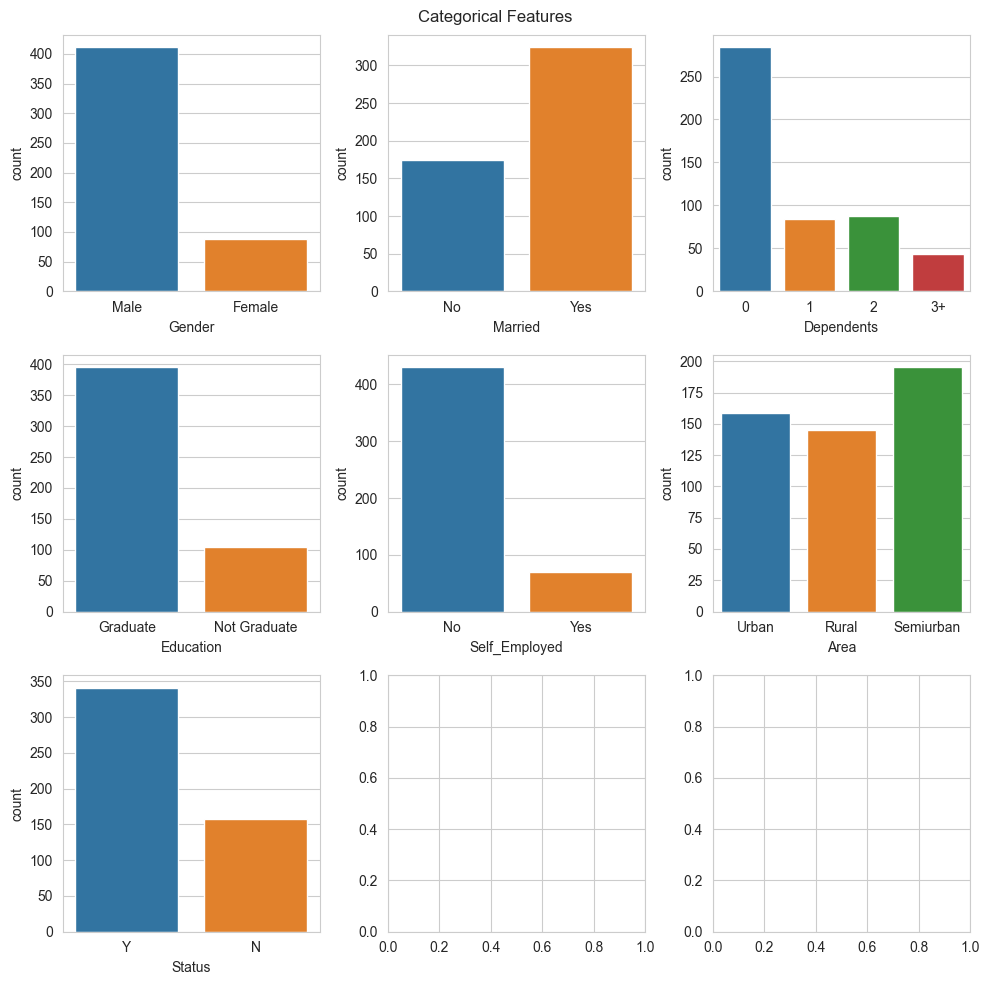

In [56]:
# Creating a list for the categorical features
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Area', 'Status']

# Checking different values in categorical features by plotting them
fig, axes = plt.subplots(3, 3, figsize=(10, 10), )
fig.suptitle('Categorical Features')
sb.countplot(ax=axes[0,0], x=df[cat_features[0]])
sb.countplot(ax=axes[0,1], x=df[cat_features[1]])
sb.countplot(ax=axes[0,2], x=df[cat_features[2]])
sb.countplot(ax=axes[1,0], x=df[cat_features[3]])
sb.countplot(ax=axes[1,1], x=df[cat_features[4]])
sb.countplot(ax=axes[1,2], x=df[cat_features[5]])
sb.countplot(ax=axes[2,0], x=df[cat_features[6]])
plt.tight_layout()
plt.show()

In [58]:
# Mapping string values to numeric values
df.replace({'Gender': {'Male':1, 'Female':0}, 
            'Married': {'Yes':1, 'No':0}, 
            'Education': {'Graduate':1, 'Not Graduate': 0},
           'Self_Employed': {'Yes':1, 'No':0},
           'Area': {'Semiurban':0, 'Urban': 1, 'Rural':2},
           'Status': {'Y':1, 'N':1},
           'Dependents': {'0':0, '1':1, '2':2, '3':3, '3+':4}})

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,1,0,584900,0.0,15000000,360.0,1.0,1,1
1,1,1,1,1,0,458300,150800.0,12800000,360.0,1.0,2,1
2,1,1,0,1,1,300000,0.0,6600000,360.0,1.0,1,1
3,1,1,0,0,0,258300,235800.0,12000000,360.0,1.0,1,1
4,1,0,0,1,0,600000,0.0,14100000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,290000,0.0,7100000,360.0,1.0,2,1
610,1,1,4,1,0,410600,0.0,4000000,180.0,1.0,2,1
611,1,1,1,1,0,807200,24000.0,25300000,360.0,1.0,1,1
612,1,1,2,1,0,758300,0.0,18700000,360.0,1.0,1,1


#### Checking numerical features

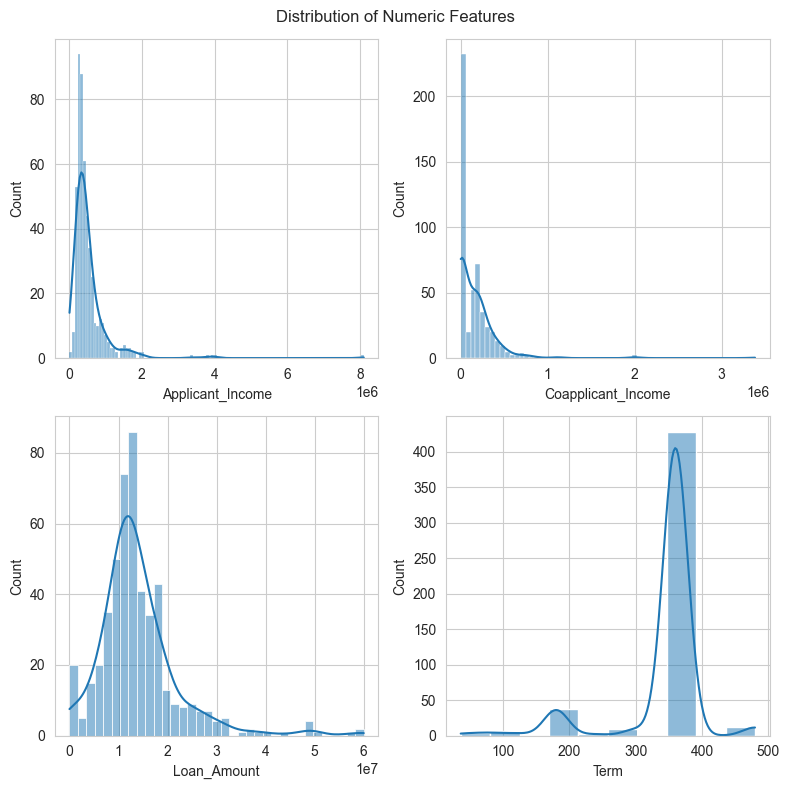

In [57]:
# Creating a list for the numeric features
nmr_features = ['Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Term']

# Plotting the distribution
fig, axes = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Distribution of Numeric Features')
sb.histplot(ax=axes[0,0], x=df[nmr_features[0]], kde=True)
sb.histplot(ax=axes[0,1], x=df[nmr_features[1]], kde=True)
sb.histplot(ax=axes[1,0], x=df[nmr_features[2]], kde=True)
sb.histplot(ax=axes[1,1], x=df[nmr_features[3]], kde=True)
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/py3-TF2.0/lib/python3.10/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


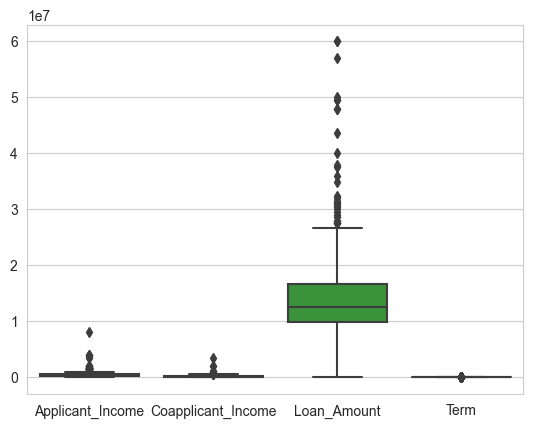

In [63]:
sb.boxplot(data=df[nmr_features])
plt.show()

In [65]:
# Before moving forward with outlier detection and transformation
# first we'll split the dataset into train and test sets not to cause
# any data leakage

from sklearn.model_selection import train_test_split

x = df.drop('Status', axis=1)
y = df['Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=101)

## References

[1] [Master Machine Learning Algorithms](https://machinelearningmastery.com/master-machine-learning-algorithms/)

[2] [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)